******Start*****
Screen: \\.\DISPLAY1
Size: 1920 x 1080
AUDIO



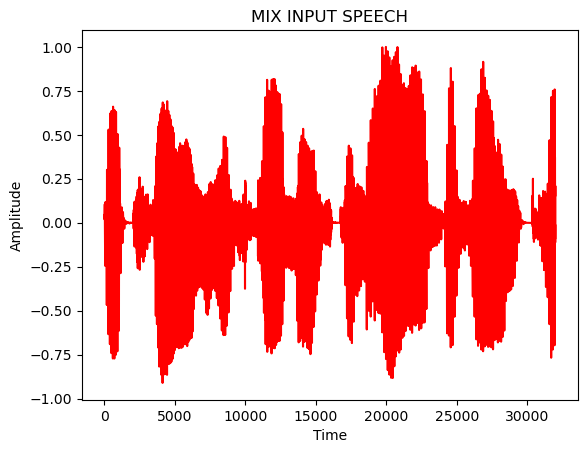

TypeError: mfcc() takes 0 positional arguments but 1 was given

Process end
******End******
Process end
******End******


SystemExit: 0

In [1]:
import os

import tkinter
from tkinter import filedialog
from tkinter import * 
from tkinter import messagebox

from PyQt5.QtCore import *
from PyQt5.QtGui import *
import PyQt5.QtWidgets as QtWidgets
from PyQt5 import QtCore, QtGui , QtWidgets
from PyQt5.QtWidgets import QMessageBox

import sys
import cv2
import numpy as np

import pickle
from numpy import linalg as LA

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
import pathlib
import warnings 
warnings.filterwarnings('ignore')
import cv2
import pickle
from numpy import linalg as LA


import librosa       

app1 = QtWidgets.QApplication(sys.argv)
screen = app1.primaryScreen()
size = screen.size()
BG_Image='A3.jpg'
image = cv2.imread(BG_Image)
image=cv2.resize(image, (size.width(),size.height()))
cv2.imwrite('y.png', image) 

def Calc_Wt(TRR,TST):
    WTRN = TRR
    R, C = np.shape(WTRN)
    M = []
    ERR = []
    WTST = TST
    R, C = np.shape(WTRN)
    print('RC',np.shape(WTRN))
    for i in range(0, C):
        RR = WTRN[:,i]
        Temp = np.subtract(WTST, RR)
        ERR = LA.norm(Temp)
        M.append(ERR)
    ind = np.argmin(M);
    return ind


    
def Gnet_Arch():
    import cv2
    import numpy as np
    import tensorflow as tf
    import matplotlib.pyplot as plt
    from keras.layers import Input, Dense
    from  keras import regularizers
    from  keras.models import Sequential, Model
    from  keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
    from  keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
    from keras.layers import Concatenate
    from keras.preprocessing.image import ImageDataGenerator
    #from keras.optimizers import Adam, SGD

    # define parameters
    CLASS_NUM = 2
    BATCH_SIZE = 16
    EPOCH_STEPS = int(4323/BATCH_SIZE)
    IMAGE_SHAPE = (224, 224, 3)
    IMAGE_TRAIN = 'Train'
    MODEL_NAME = 'Gnet.h5'

    def inception(x, filters):
            path1 = Conv2D(filters=filters[0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
            path2 = Conv2D(filters=filters[1][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
            path2 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', activation='relu')(path2)
            path3 = Conv2D(filters=filters[2][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
            path3 = Conv2D(filters=filters[2][1], kernel_size=(5,5), strides=1, padding='same', activation='relu')(path3)
            path4 = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(x)
            path4 = Conv2D(filters=filters[3], kernel_size=(1,1), strides=1, padding='same', activation='relu')(path4)
            return Concatenate(axis=-1)([path1,path2,path3,path4])
    def auxiliary(x, name=None):
            layer = AveragePooling2D(pool_size=(5,5), strides=3, padding='valid')(x)
            layer = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
            layer = Flatten()(layer)
            layer = Dense(units=256, activation='relu')(layer)
            layer = Dropout(0.4)(layer)
            layer = Dense(units=CLASS_NUM, activation='softmax', name=name)(layer)
            return layer
    def googlenet():
            layer_in = Input(shape=IMAGE_SHAPE)
            layer = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu')(layer_in)
            layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
            layer = BatchNormalization()(layer)
            layer = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
            layer = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', activation='relu')(layer)
            layer = BatchNormalization()(layer)
            layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
            layer = inception(layer, [ 64,  (96,128), (16,32), 32]) #3a
            layer = inception(layer, [128, (128,192), (32,96), 64]) #3b
            layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
            layer = inception(layer, [192,  (96,208),  (16,48),  64]) #4a
            aux1  = auxiliary(layer, name='aux1')
            layer = inception(layer, [160, (112,224),  (24,64),  64]) #4b
            layer = inception(layer, [128, (128,256),  (24,64),  64]) #4c
            layer = inception(layer, [112, (144,288),  (32,64),  64]) #4d
            aux2  = auxiliary(layer, name='aux2')
            layer = inception(layer, [256, (160,320), (32,128), 128]) #4e
            layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
            layer = inception(layer, [256, (160,320), (32,128), 128]) #5a
            layer = inception(layer, [384, (192,384), (48,128), 128]) #5b
            layer = AveragePooling2D(pool_size=(7,7), strides=1, padding='valid')(layer)
            layer = Flatten()(layer)
            layer = Dropout(0.4)(layer)
            layer = Dense(units=256, activation='linear')(layer)
            main = Dense(units=CLASS_NUM, activation='softmax', name='main')(layer)
            model = Model(inputs=layer_in, outputs=[main, aux1, aux2])    
            return model


    model= googlenet()
    return model
    




print('******Start*****')
try:
    _fromUtf8 = QtCore.QString.fromUtf8
except AttributeError:
    def _fromUtf8(s):
        return s

try:
    _encoding = QtWidgets.QApplication.UnicodeUTF8
    def _translate(context, text, disambig):
        return QtWidgets.QApplication.translate(context, text, disambig, _encoding)
except AttributeError:
    def _translate(context, text, disambig):
        return QtWidgets.QApplication.translate(context, text, disambig)

class Ui_MainWindow1(object):
    

    def setupUii(self, MainWindow):
        MainWindow.setObjectName(_fromUtf8("MainWindow"))
        MainWindow.resize(1200,800)
        MainWindow.setStyleSheet(_fromUtf8("\n""background-image: url(y.png);\n"""))
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName(_fromUtf8("centralwidget"))

        
        #TITLE
        self.u_user_label2 = QtWidgets.QLabel(MainWindow)
        self.u_user_label2.setGeometry(QtCore.QRect(150, 30, 300, 50))
        self.u_user_label2.setObjectName(_fromUtf8("u_user_label2"))
        self.u_user_label2.setFont(QFont('Times', 15))
        self.u_user_label2.setStyleSheet("background-image: url(milkwhite.jpg);;border: 2px solid magneta")
        entered_text='DEEP FAKE DETECTION'
        self.u_user_label2.setText(f" {entered_text}")
        '''

        self.u_user_label2 = QtWidgets.QLabel(MainWindow)
        self.u_user_label2.setGeometry(QtCore.QRect(300, 10, 400, 30))
        self.u_user_label2.setObjectName(_fromUtf8("u_user_label2"))
        self.u_user_label2.setFont(QFont('Times', 20))
        self.u_user_label2.setStyleSheet("background-image: url(milkwhite.jpg);;border: 2px solid magneta")
        '''
        
        

        self.pushButton = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton.setGeometry(QtCore.QRect(150, 320, 131, 27))
        self.pushButton.clicked.connect(self.quit)
        self.pushButton.setStyleSheet(_fromUtf8("background-color: rgb(255, 128, 0);\n""color: rgb(0, 0, 0);"))
        self.pushButton.setStyleSheet("background-image: url(white.jpg);;border: 2px solid yellow")
        self.pushButton.setObjectName(_fromUtf8("pushButton"))

        
        self.pushButton_2 = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton_2.setGeometry(QtCore.QRect(150, 200, 131, 27))
        self.pushButton_2.clicked.connect(self.show1)
        self.pushButton_2.setStyleSheet(_fromUtf8("background-color: rgb(255, 128, 0);\n""color: rgb(0, 0, 0);"))
        self.pushButton_2.setObjectName(_fromUtf8("pushButton_2"))
        self.pushButton_2.setStyleSheet("background-image: url(white.jpg);;border: 2px solid yellow")
        
        self.pushButton_4 = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton_4.setGeometry(QtCore.QRect(150, 240, 131, 27))
        self.pushButton_4.clicked.connect(self.show2)
        self.pushButton_4.setStyleSheet(_fromUtf8("background-color: rgb(255, 128, 0);\n""color: rgb(0, 0, 0);"))
        self.pushButton_4.setObjectName(_fromUtf8("pushButton_4"))
        self.pushButton_4.setStyleSheet("background-image: url(white.jpg);;border: 2px solid yellow")

        
        self.pushButton_5 = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton_5.setGeometry(QtCore.QRect(150, 280, 131, 27))
        self.pushButton_5.clicked.connect(self.show3)
        self.pushButton_5.setStyleSheet(_fromUtf8("background-color: rgb(255, 128, 0);\n""color: rgb(0, 0, 0);"))
        self.pushButton_5.setObjectName(_fromUtf8("pushButton_5"))
        self.pushButton_5.setStyleSheet("background-image: url(white.jpg);;border: 2px solid yellow")
        
        
        

        MainWindow.setCentralWidget(self.centralwidget)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName(_fromUtf8("statusbar"))
        MainWindow.setStatusBar(self.statusbar)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)
       
        

    def retranslateUi(self, MainWindow):
        MainWindow.setWindowTitle(_translate("MainWindow", "DEEP FAKE DETECTION", None))
        self.pushButton_2.setText(_translate("MainWindow", "TEST IMAGE", None))
        self.pushButton_4.setText(_translate("MainWindow", "TEST AUDIO", None))
        self.pushButton_5.setText(_translate("MainWindow", "TRAIN", None))
        self.pushButton.setText(_translate("MainWindow", "EXIT", None))

    def quit(self):
        print ('Process end')
        print ('******End******')
        quit()
         
    def show1(self):
        print('TEST\n')
        # VIDEO READ
        fnam= filedialog.askopenfilename(filetypes = (("BROWSE ", "*.jpg"), ("All files", "*")))


        # -----------------------------------------------
        #               MAIN CODE
        # -----------------------------------------------
        # READ IMAGE
        img=cv2.imread(fnam)
        cv2.imshow('INPUT IMAGE',img)
        cv2.waitKey(100)
        cv2.destroyAllWindows()

        # RESIZING
        img = cv2.resize(img,(256,256),3)
        cv2.imshow('RESIZED IMAGE',img)
        cv2.waitKey(100)
        cv2.destroyAllWindows()

        # MEDIAN FILTERED
        img1 = cv2.medianBlur(img,5)
        cv2.imshow('MEDIAN IMAGE',img1)
        cv2.waitKey(100)
        cv2.destroyAllWindows()


        # GRAY CONVERSION
        gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
        cv2.imshow('GRAY IMAGE',gray)
        cv2.waitKey(100)
        cv2.destroyAllWindows()

        img=gray
        gray=process(img, GF)
        cv2.imshow('GF',gray)
        cv2.waitKey(100)
        cv2.destroyAllWindows()

        TST=np.reshape(gray,(256*256))
        TST=np.ravel(TST)
        TST=np.transpose(TST)
        print('TEST SIZE',np.shape(TST))

        file= open("model.h5",'rb')
        CNN = pickle.load(file)
        file.close()

        CNN=np.transpose(CNN)
        print(np.shape(CNN),np.shape(TST))
        n=Calc_Wt(CNN,TST)
        RES1=np.floor(n/250)
        print('index',RES1)



        if RES1==0:
            Dis='FAKE'
            easygui.msgbox("AUDIO RESULT --> FAKE IMAGE !", title="simple gui")
        elif RES1==1:
            Dis='NORMAL'
            easygui.msgbox("AUDIO RESULT --> NORMAL IMAGE!", title="simple gui")
        print('-------------------------------------------------------\n')
        print('                     ',Dis,'                         \n')
        print('-------------------------------------------------------\n')

                

       
    def show3(self):
        print('TEST\n')
        model=Gnet_Arch()
        '''
        model_json = model.to_json()
        with open("model.json",'w') as json_file:
            json_file.write(model_json)
        model.save("model.h5")
        '''

    def show2(self):
        print('AUDIO\n')

        # VIDEO READ
        fnam= filedialog.askopenfilename(filetypes = (("BROWSE ", "*.wav"), ("All files", "*")))

        # -----------------------------------------------
        #               MAIN CODE
        # -----------------------------------------------
        # READ AUDIO

        I1, sr_1 = librosa.load(fnam, sr=None)
        plt.plot(I1,'r')
        plt.ylabel('Amplitude')
        plt.xlabel('Time')
        plt.title('MIX INPUT SPEECH')
        plt.show()

        A1=librosa.feature.mfcc(I1)
        TST=np.sum(A1,axis=1)
        TST=np.ravel(TST)
        TST=np.transpose(TST)

        file= open("model2.h5",'rb')
        CNN = pickle.load(file)
        file.close()

        CNN=np.transpose(CNN)
        n=Calc_Wt(CNN,TST)
        RES1=np.floor(n/100)

        if RES1==0:
            Dis='FAKE'
            easygui.msgbox("AUDIO RESULT --> FAKE AUDIO!", title="simple gui")
        elif RES1==1:
            Dis='NORMAL'
            easygui.msgbox("AUDIO RESULT --> NORMAL AUDIO!", title="simple gui")
        print('-------------------------------------------------------\n')
        print('                     ',Dis,'                         \n')
        print('-------------------------------------------------------\n')






if __name__ == "__main__":
    import sys
    app = QtWidgets.QApplication(sys.argv)
    screen = app.primaryScreen()
    print('Screen: %s' % screen.name())
    size = screen.size()
    print('Size: %d x %d' % (size.width(), size.height()))
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow1()
    ui.setupUii(MainWindow)
    MainWindow.move(10, 10)
    MainWindow.show()
    sys.exit(app.exec_())


